<a href="https://colab.research.google.com/github/Jhonjaxde/TALLERUNO/blob/main/Taller1_WS_Arteaga_jhon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Procesando página 1...
Procesando página 2...
Procesando página 3...
Procesando página 4...
Procesando página 5...
Procesando página 6...
Procesando página 7...
Procesando página 8...
Procesando página 9...
Procesando página 10...
Datos guardados en 'juegos_totales_opencritic.csv'
Total de juegos scrapeados: 200
     Año  Cantidad de Juegos
0   2005                   1
1   2008                   1
2   2013                   5
3   2014                   9
4   2015                  13
5   2016                  14
6   2017                  15
7   2018                  23
8   2019                  11
9   2020                  18
10  2021                   9
11  2022                  16
12  2023                  33
13  2024                  32


<ipython-input-18-117208cf3cb0>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Año', y='Cantidad de Juegos', data=conteo_por_año, palette='magma')


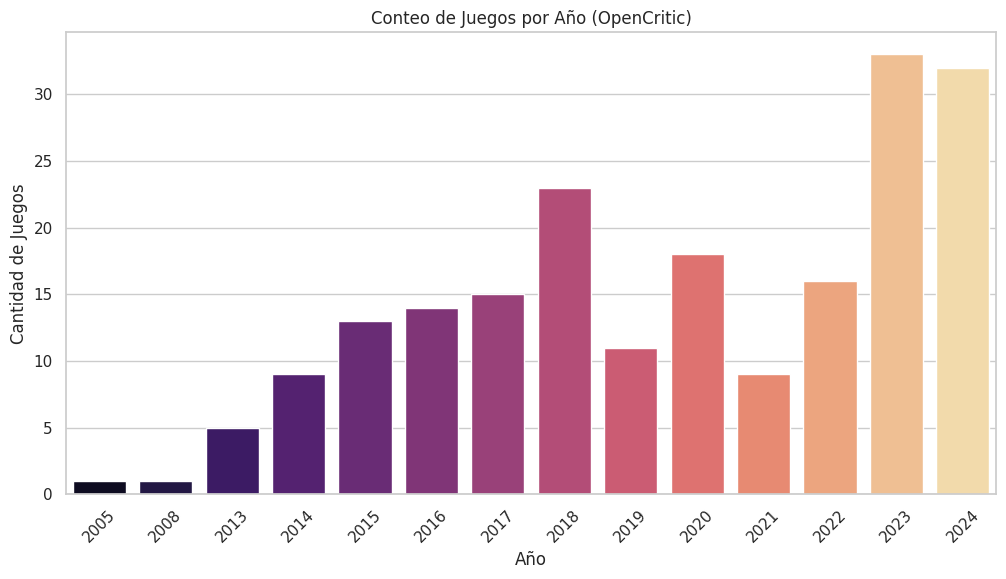

In [18]:
#Codigo para el conteo de videjuegos por año
# Importar bibliotecas necesarias
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time  # Para agregar retrasos entre solicitudes
from google.colab import files
# Configurar estilo de gráficos
sns.set(style="whitegrid")

# 1. Configurar la URL base y variables
url_base = "https://opencritic.com/browse/all?page={}"  # URL con paginación
paginas = 10  # Número de páginas a scrapear
juegos_totales = []  # Lista para guardar juegos y años

# Configurar headers para evitar bloqueos
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

# 2. Ciclo para descargar y procesar múltiples páginas
for pagina in range(1, paginas + 1):
    print(f"Procesando página {pagina}...")
    url = url_base.format(pagina)  # Crear la URL específica
    response = requests.get(url, headers=headers)  # Descargar el contenido de la página

    # Verificar si la solicitud fue exitosa
    if response.status_code == 200:
        html = response.content
        soup = BeautifulSoup(html, 'html.parser')  # Procesar el HTML
        lista_titulos = []
        lista_fecha = []

        # Extraer los títulos de los juegos y sus fechas de lanzamiento
        juegosT = soup.find_all('div', class_='game-name col ml-2')
        juegosF = soup.find_all('div', class_='first-release-date col-auto show-year')

        # Iterar y guardar datos correctamente
        for titulo, fecha in zip(juegosT, juegosF):
          titulo_texto = titulo.find('a', attrs={'_ngcontent-sc167': True}).text.strip() if titulo.find('a', attrs={'_ngcontent-sc167': True}) else "Sin título"
          fecha_texto = fecha.find('span', attrs={'_ngcontent-sc167': True}).text.strip() if fecha.find('span', attrs={'_ngcontent-sc167': True}) else "Sin fecha"
          juegos_totales.append({'Titulo': titulo_texto, 'Fecha': fecha_texto})


        if lista_titulos and lista_fecha:
            titulo_texto = lista_titulos.text.strip()
            fecha_texto = lista_fecha.text.strip()  # Puede contener texto adicional, ajústalo según necesidad

            # Guardar título y fecha en la lista
            juegos_totales.append({'Titulo': titulo_texto, 'Fecha': fecha_texto})
    else:
        print(f"No se pudo acceder a la página {pagina}. Código de estado: {response.status_code}")

    # Agregar un retraso entre solicitudes
    time.sleep(2)

# 3. Guardar los datos en un archivo CSV
df = pd.DataFrame(juegos_totales)
df.to_csv('juegos_totales_opencritic.csv', index=False)
print("Datos guardados en 'juegos_totales_opencritic.csv'")
print(f"Total de juegos scrapeados: {len(juegos_totales)}")
#files.download('juegos_totales_opencritic.csv')

# 4. Cargar los datos y contar juegos por año (adaptar según los datos de OpenCritic)
df = pd.read_csv('juegos_totales_opencritic.csv')

# Extraer el año de la columna 'Fecha' (ajustar según el formato de fecha en OpenCritic)
df['Año'] = pd.to_datetime(df['Fecha'], errors='coerce').dt.year
df = df[df['Año'].notna()]
# Agrupar por año y contar la cantidad de juegos
conteo_por_año = df['Año'].value_counts().sort_index().reset_index()
conteo_por_año.columns = ['Año', 'Cantidad de Juegos']

# Mostrar la tabla resultante
print(conteo_por_año)

# 5. Graficar la cantidad de juegos por año
plt.figure(figsize=(12,6))
sns.barplot(x='Año', y='Cantidad de Juegos', data=conteo_por_año, palette='magma')
plt.title('Conteo de Juegos por Año (OpenCritic)')
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()

Procesando página 1...
Procesando página 2...
Procesando página 3...
Procesando página 4...
Procesando página 5...
Procesando página 6...
Procesando página 7...
Procesando página 8...
Procesando página 9...
Procesando página 10...
Datos guardados en 'juegos_totales_opencritic.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

     Año  Cantidad de Juegos con Calificacion Maxima
0   2005                                           1
1   2008                                           1
2   2013                                           1
3   2014                                           1
4   2015                                           4
5   2016                                           2
6   2017                                           1
7   2018                                           1
8   2019                                           1
9   2020                                           1
10  2021                                           1
11  2022                                           1
12  2023                                           2
13  2024                                           1
Total de juegos scrapeados: 200


<ipython-input-17-4f95abe477a6>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Año', y='Cantidad de Juegos con Calificacion Maxima', data=conteo_juegos_maximos, palette='viridis')


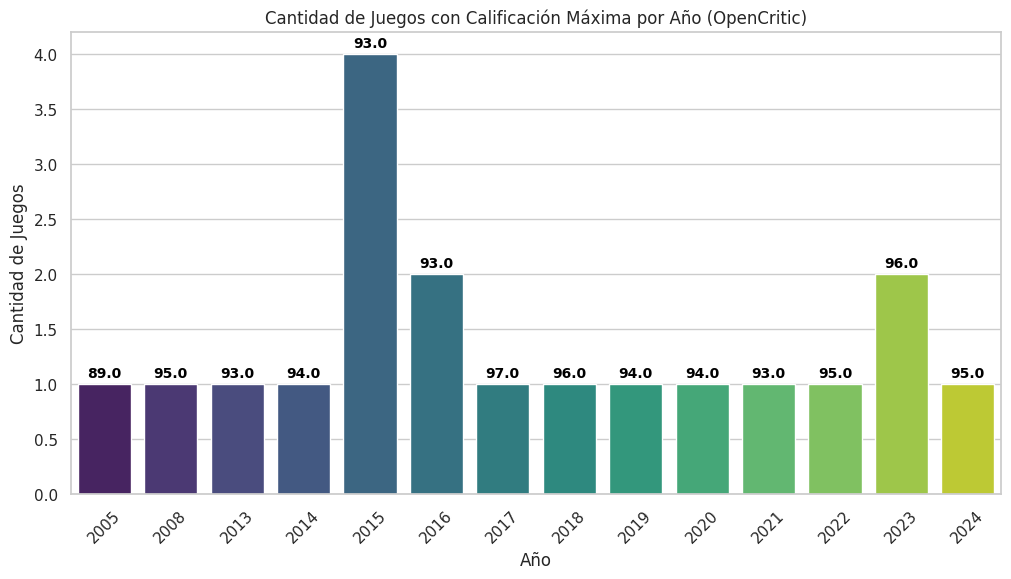

In [17]:
#Codigo para el conteo de videjuegos con maxima calificacion de OpenCritic por año
# Importar bibliotecas necesarias
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from google.colab import files

# Configurar estilo de gráficos
sns.set(style="whitegrid")

# 1. Configurar la URL base y variables
url_base = "https://opencritic.com/browse/all?page={}"  # URL con paginación
paginas = 10  # Número de páginas a scrapear
juegos_totales = []  # Lista para guardar juegos, años y calificaciones

# Configurar headers para evitar bloqueos
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

# 2. Ciclo para descargar y procesar múltiples páginas
for pagina in range(1, paginas + 1):
    print(f"Procesando página {pagina}...")
    url = url_base.format(pagina)  # Crear la URL específica
    response = requests.get(url, headers=headers)  # Descargar el contenido de la página

    # Verificar si la solicitud fue exitosa
    if response.status_code == 200:
        html = response.content
        soup = BeautifulSoup(html, 'html.parser')  # Procesar el HTML
        juegosT = soup.find_all('div', class_='game-name col ml-2')
        juegosF = soup.find_all('div', class_='first-release-date col-auto show-year')
        juegosC = soup.find_all('div', class_='score col-auto')

        # Iterar y guardar datos correctamente
        for titulo, fecha, calificacion in zip(juegosT, juegosF, juegosC):
            titulo_texto = titulo.find('a', attrs={'_ngcontent-sc167': True}).text.strip() if titulo.find('a', attrs={'_ngcontent-sc167': True}) else "Sin título"
            fecha_texto = fecha.find('span', attrs={'_ngcontent-sc167': True}).text.strip() if fecha.find('span', attrs={'_ngcontent-sc167': True}) else "Sin fecha"
            calificacion_texto = calificacion.find('div', class_='inner-orb small-orb').text.strip() if calificacion.find('div', class_='inner-orb small-orb') else "Sin fecha"
            juegos_totales.append({'Titulo': titulo_texto, 'Fecha': fecha_texto, 'Calificacion': float(calificacion_texto)})
    else:
        print(f"No se pudo acceder a la página {pagina}. Código de estado: {response.status_code}")

    # Agregar un retraso entre solicitudes
    time.sleep(2)

# 3. Guardar los datos en un archivo CSV
df = pd.DataFrame(juegos_totales)
df.to_csv('juegos_totales_opencritic.csv', index=False)
print("Datos guardados en 'juegos_totales_opencritic.csv'")
files.download('juegos_totales_opencritic.csv')

# 4. Cargar los datos y procesar calificaciones
df = pd.read_csv('juegos_totales_opencritic.csv')

# Extraer el año de la columna 'Fecha'
df['Año'] = pd.to_datetime(df['Fecha'], errors='coerce').dt.year
df = df[df['Año'].notna()]  # Eliminar filas con años no válidos

# Convertir la columna Calificacion a numérico (si no lo está)
df['Calificacion'] = pd.to_numeric(df['Calificacion'], errors='coerce')
df = df[df['Calificacion'].notna()]  # Eliminar filas con calificaciones no válidas

# 5. Contar juegos con calificación máxima por año
maximos_por_año = df.groupby('Año')['Calificacion'].max().reset_index()
maximos_por_año.columns = ['Año', 'Calificacion']

# Filtrar juegos que tienen la calificación máxima por año
juegos_mejor_calificados = pd.merge(df, maximos_por_año, on=['Año', 'Calificacion'])
conteo_juegos_maximos = juegos_mejor_calificados.groupby('Año').size().reset_index(name='Cantidad de Juegos con Calificacion Maxima')

# Mostrar la tabla resultante
print(conteo_juegos_maximos)
print(f"Total de juegos scrapeados: {len(juegos_totales)}")

# 6. Graficar la cantidad de juegos con la calificación máxima por año y agregar anotaciones
plt.figure(figsize=(12, 6))
sns.barplot(x='Año', y='Cantidad de Juegos con Calificacion Maxima', data=conteo_juegos_maximos, palette='viridis')

# Agregar títulos y etiquetas
plt.title('Cantidad de Juegos con Calificación Máxima por Año (OpenCritic)')
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)

# Agregar las calificaciones más altas encima de cada barra
for index, row in conteo_juegos_maximos.iterrows():
    calificacion_maxima = maximos_por_año[maximos_por_año['Año'] == row['Año']]['Calificacion'].values[0]
    plt.annotate(f"{calificacion_maxima:.1f}",  # Calificación con un decimal
                 (index, row['Cantidad de Juegos con Calificacion Maxima']),
                 textcoords="offset points",  # Usar coordenadas relativas
                 xytext=(0, 5),  # Desplazamiento del texto
                 ha='center', color='black', fontsize=10, fontweight='bold')


plt.show()
